# Exercícios para entrega (Prova)

## Questão 5

$p(x|\omega_{1}) \backsim \mathcal{N}\left(\mu_{1}=\begin{bmatrix}8\\7\end{bmatrix}, \Sigma_{1}=\begin{bmatrix}1&0\\0&1\end{bmatrix}\right)$

$p(x|\omega_{2}) \backsim \mathcal{N}\left(\mu_{2}=\begin{bmatrix}2\\0\end{bmatrix}, \Sigma_{2}=\begin{bmatrix}1&0\\0&1\end{bmatrix}\right)$

$P(\omega_{1}) = P(\omega_{2}) = \dfrac{1}{2}$

In [1]:
# Importação de módulos
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import numpy as np

np.random.seed(100)

In [2]:
# Delimitação de dimensões para as figuras
X_MIN = 0
X_MAX = 20
N_PONTOS = 1000

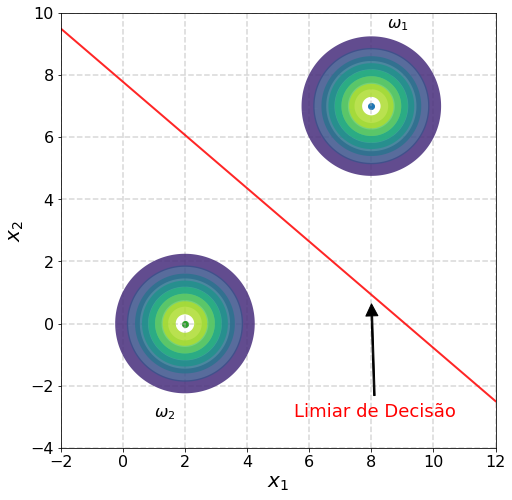

In [67]:
x, y = np.mgrid[-2:12.01:0.01, -4:10.01:0.01]
pos = np.dstack((x, y))

mu1 = [8, 7]
mu2 = [2, 0]

epsilon1 = [[1, 0], [0, 1]]
epsilon2 = [[1, 0], [0, 1]]

plt.figure(figsize=(10, 8))
plt.axes().set_aspect('equal')

plt.scatter(mu1[0], mu1[1], color='C0')
plt.scatter(mu2[0], mu2[1], color='C2')

rv1 = multivariate_normal(mu1, epsilon1)
plt.annotate(r'$\omega_{1}$', xy=(8.5, 9.50), fontsize=16)
rv2 = multivariate_normal(mu2, epsilon2)
plt.annotate(r'$\omega_{2}$', xy=(1.0, -3.0), fontsize=16)

plt.contour(x, y, rv1.pdf(pos), linewidths=13, alpha=0.85)
# plt.contourf(x, y, rv1.pdf(pos))

plt.contour(x, y, rv2.pdf(pos), linewidths=13, alpha=0.85)
# plt.contourf(x, y, rv2.pdf(pos))

# plt.colorbar()

a = -6/7
b = 109/14

x1 = np.linspace(-2, 12, 10000, endpoint=True)
x2 = a * x1 + b
plt.plot(x1, x2, LineWidth=2, linestyle='-', color='red', alpha=0.85)

plt.annotate('Limiar de Decisão', 
             xy=(8, 0.8), 
             xytext=(5.5, -3), 
             arrowprops=dict(facecolor='black', 
                             shrink=0.05, 
                             width=1.5, 
                             edgecolor='black'), 
             color='red', 
             fontsize=18)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel(r'$x_{1}$', fontsize=20)
plt.ylabel(r'$x_{2}$', fontsize=20)

plt.grid(True, linestyle='--', linewidth=1.5, alpha=0.5)

plt.savefig('ml_prova_05a.pdf', formar='pdf', dpi=300, transparent=True, bbox_inches='tight')

plt.show()